<a href="https://colab.research.google.com/github/Plumz17/PCD_Assignment01/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Digital Image Processing Assignment
##Analysis of Upsampling and Downsampling Methods - Anders Emmanuel Tan (24/541351/PA/22964)

## 1. Setting Up Image to be Processed

In [1]:
#Cloning Github Repository to get the Image
!rm -rf PCD_Assignment01
!git clone https://github.com/Plumz17/PCD_Assignment01

Cloning into 'PCD_Assignment01'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 51 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 3.71 MiB | 17.42 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Image Matrix
import matplotlib.pyplot as plt # For Showing Image

filename1 = "/content/PCD_Assignment01/image.png" # Image Source: https://www.britannica.com/animal/booby
filename2 = "/content/PCD_Assignment01/image_low.png" # Image Source: https://mahkamahnews.org/2020/03/15/pemberlakuan-kuliah-online-di-ugm-dalam-merespon-penyebaran-virus-corona/

img = cv2.imread(filename1) # Read Image
img2 = cv2.imread(filename2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Change the color map since apparently CV2 defaults on BGR and not RGB'
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [3]:
def show(img): # Helper function to check if image can be processed
  plt.imshow(img)

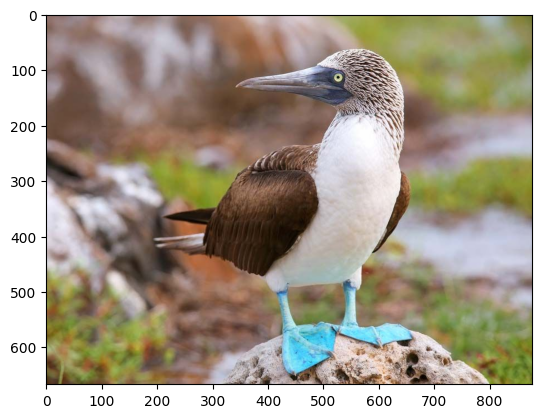

In [4]:
show(img) # Citra yang digunakan untuk Downsampling

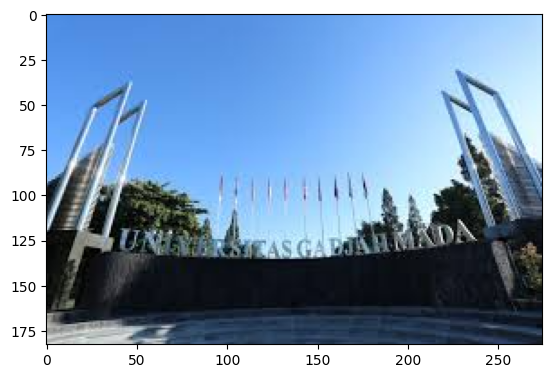

In [5]:
show(img2) # Citra yang digunakan untuk Upsampling (sengaja menggunakan citra dengan resolusi rendah)

## 2. Downsampling Using Maximum Method

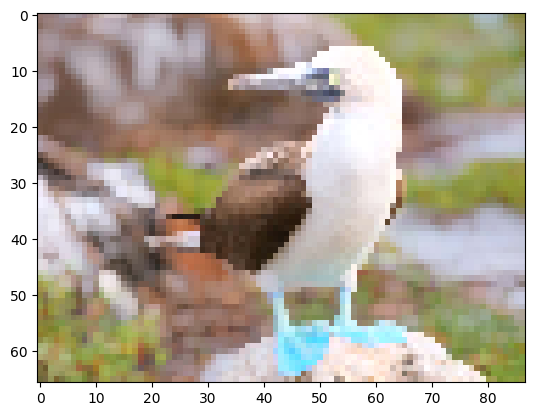

In [6]:
#Down Sampling using Maximum Method
def downsample_max(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  if (new_height == 0 or new_width == 0):
    print("Factor is to high, Can't Down Sample")
    return
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.max(block, axis=(0, 1)) # Find the maximum value for each channel within the block and keep the channels intact.
  return new_img

new_image_max = downsample_max(img, 10)
show(new_image_max)

###Analisis Downsampling Metode Maksimum
Metode Max Pooling bekerja dengan mengambil intensitas/value maksimum dari setiap "block" dari citra yang ingin diproses dan menempatkan pixel tersebut pada citra yang baru. Pendekatan ini memiliki beberapa efek kepada citra yang telah di Downsample. Pertama, Metode ini akan meninggalkan intensitas yang paling tinggi sehingga metode ini dapat bekerja baik dalam menyoroti tepi/edges atau bagian-bagian terang pada suatu citra. Namun, hal tersebut juga membuat citra sangat sensitif jika ada satu saja pixel yang memiliki intensitas tinggi di suatu darah. Dengan itu, metode ini akan baik digunakan jika kita ingin menentukan fitur-fitur menonjol pada suatu gambar karena metode ini menjaga detail-detail yang memiliki kontras tinggi.

## 3. Downsampling using Average Method

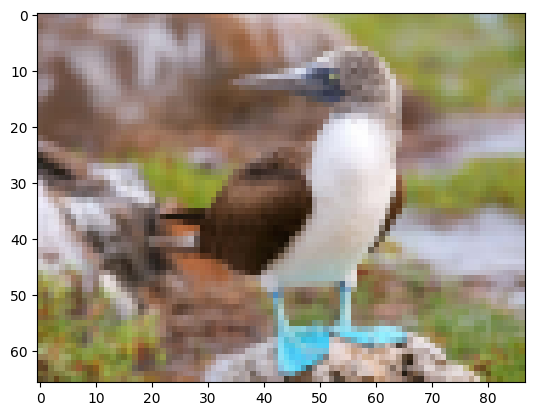

In [7]:
#Downsampling using Average Method

def downsample_avg(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.average(block, axis=(0, 1)) # Find the average value for each channel within the block and keep the channels intact.
  return new_img

new_image_avg = downsample_avg(img, 10)
show(new_image_avg)

###Analisis Downsampling Metode Average
Metode Average Pooling bekerja dengan mengambil intensitas/value rata-rata dari setiap "block" dari citra yang ingin diproses dan menempatkan pixel tersebut pada citra yang baru. Seperti pada Metode sebelumnya, Pendekatan ini memiliki beberapa efek kepada citra yang telah di Downsample. Pertama, Metode ini akan membuat citra yang diproses menjadi tampak halus. Hal tersebut membuat hasil citra lebih terlihat alami dan juga mengurangi kebisingan yang berada pada citra. Namun, hal tersebut juga membuat tepi dan detail yang terdapat pada citra menjadi kabur sehingga metode ini mungkin kurang cocok ketika kita membutuhkan kedua hal tersebut.

## 4. Downsampling using Median Method

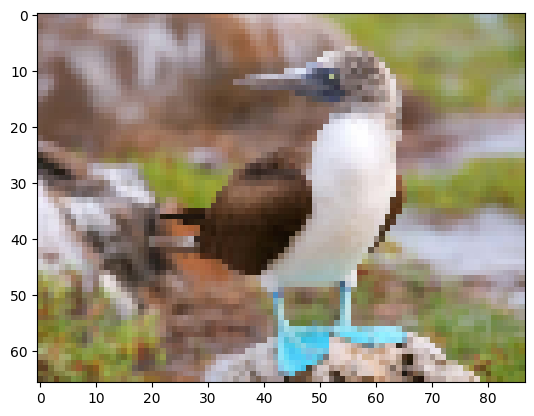

In [8]:
#Downsampling using Median Method

def downsample_med(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.median(block, axis=(0, 1)) # Find the median value for each channel within the block and keep the channels intact.
  return new_img

new_image_med = downsample_med(img, 10)
show(new_image_med)

###Analisis Downsampling Metode Median
Metode Median Pooling bekerja dengan mengambil intensitas/value mediam dari setiap "block" dari citra yang ingin diproses dan menempatkan pixel tersebut pada citra yang baru. Seperti pada kedua Metode sebelumnya, Pendekatan ini memiliki beberapa efek kepada citra yang telah di Downsample. Pertama, Metode ini dapat menghilangkan pixel-pixel yang merupakan outlier yang ekstrim lebih baik dibandingkan dua pendekatan sebelumnya. Selain itu, implementasi ini akan lebih mempertahankan tepi dan detail dibandingkan metode rerata. Walaupun begitu, metode ini memerlukan penggunaan komputasi yang tinggi karena ia harus mengurutkan intensitas pada suatu block. Oleh karena itu, metode ini akan baik digunakan jika citra yang akan diproses memiliki banyak kebisingan/noise.

## 5. Upsampling using Nearest Neighbor Method

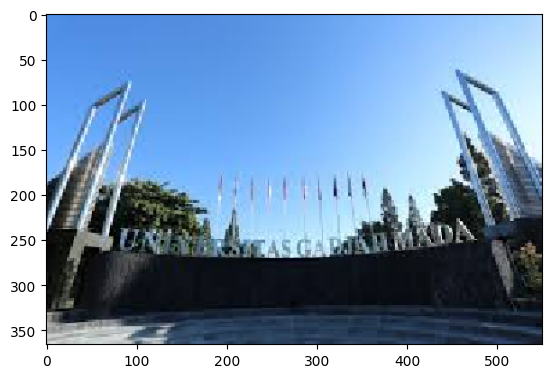

In [9]:
#Up Sampling using Nearest Neighbor Method

def upsample_nn(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the increased size

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Get Old pixel location
      old_i = int(round(i / factor))
      old_j = int(round(j / factor))

      # Make sure the value is not out of bounds
      old_i = min(old_i, height - 1)
      old_j = min(old_j, width - 1)

      # Set the new pixel to the value of the old pixels
      new_img[i, j] = img[old_i, old_j]

  return new_img

new_image_nn = upsample_nn(img2, 2)
show(new_image_nn)

###Analisis Upsampling Metode Nearest Neighbour
Metode Nearest Neighbor bekerja dengan mengambil suatu pixel dari citra dan menemukan tetangga pixel tersebut dan mengambil value minimal dari tetangga-tetangga tersebut untuk dijadikan value pixel tersebut. Dengan kata lain, untuk setiap pixel pada citra baru, ia akan menyalin value dari pixel terdekat pada citra yang lama. Metode sangat cepat dan mudah untuk diimplementasikan. Namun, citra yang dihasilkan akan berkotak-kotak dan memiliki tepi yang bergerigi. Selain itu, pixel baru tidak akan memperkenalkan value yang baru karena metode ini mempertahankan value citra lama secara persis. Sebagai seseorang yang sering membuat aplikasi permainan/gim, implementasi ini dapat diaplikasikan dalam penggunaan gambar pixel karena gambar tersebut dapat dibesarkan tanpa mengubah value dari pixel-pixel yang lama.

## 6. Upsampling using Bilinear Method

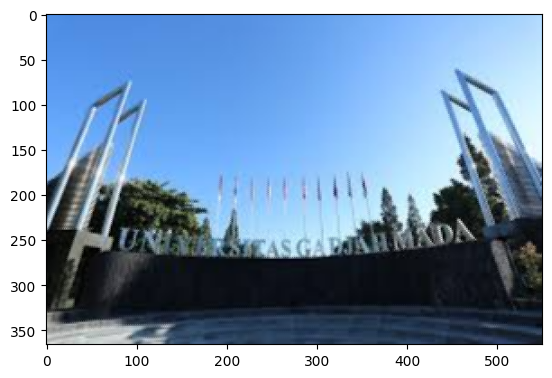

In [20]:
#Up Sampling using Bilinear Method

def upsample_bilinear(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.full((new_height, new_width, channels), -1, dtype=float) # Create an image with the increased size with all values initialized to -1 (not zero to not confuse with 0 or black)

  for i in range(height): #Fill the new image with old pixels
    for j in range(width):
      new_img[i * factor, j * factor] = img[i, j]

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      if not (new_img[i, j] == -1).all(): #Skip old pixels
        continue

      # Get Old pixel location
      old_i = int(i / factor)
      old_j = int(j / factor)

      # Get neighbors of the new pixel
      i0, j0 = int(np.floor(old_i)), int(np.floor(old_j))
      i1, j1 = min(i0+1, height-1), min(j0+1, width-1) #Make sure not to get out of bounds

      # Collect 4-neighbors into an array
      neighbors = [
        img[i0, j0],
        img[i0, j1],
        img[i1, j0],
        img[i1, j1]
      ]

      # Average neighbors and use the average in the new image
      new_img[i, j] = np.mean(neighbors, axis=0)

  return new_img.astype(np.uint8)

new_image_bilinear = upsample_bilinear(img2, 2)
show(new_image_bilinear)

###Analisis Upsampling Bilinear
Metode Bilinear bekerja dengan mengambil suatu pixel dari citra dan menemukan tetangga (4-neighbour) pixel tersebut dan mengambil value rata-rata dari tetangga-tetangga tersebut untuk dijadikan value pixel tersebut. Tidak seperti Metode Nearest Neighbor yang menghasilkan citra bergerigi, teknik interpolasi bilinear membuat citra output lebih halus. Hal tersebut dapat memiliki sisi positif dan negatif. Pada satu sisi, teknik ini membuat citra terlihat lebih halus tanpa mengkompromi kecepatan pemrosesan citra. Pada sisi lainnya, seperti downsampling metode average, output citra yang dihasilkan akan menghilangkan detail-detail gambar yang mungkin penting untuk ditunjukan, hal ini dapat dilihat ketika kita menggunakan citra yang memiliki tekstur.

## 7. Upsampling using Bicubic Method

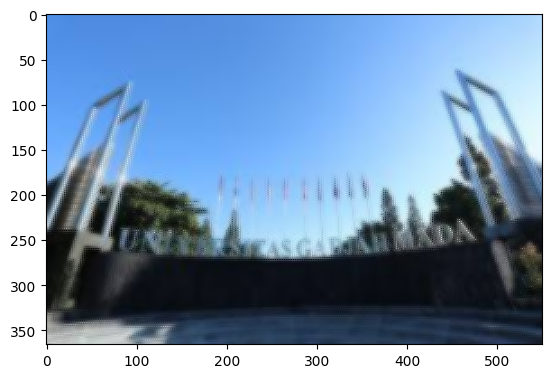

In [17]:
#Up Sampling using Bicubic Method

def upsample_bicubic(img, factor, w1=0.6, w2=0.4):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.full((new_height, new_width, channels), -1, dtype=float) # Create an image with the increased size with all values initialized to -1 (not zero to not confuse with 0 or black)

  for i in range(height): #Fill the new image with old pixels
    for j in range(width):
      new_img[i * factor, j * factor] = img[i, j]

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      if not (new_img[i, j] == -1).all(): #Skip old pixels
        continue
      # Get Old pixel location
      old_i = int(i / factor)
      old_j = int(j / factor)
      # collect inner ring (direct neighbors)
      inner = []
      for x in [-1, 0, 1]:
        for y in [-1, 0, 1]:
          if x == 0 and y == 0: # Don't include center
            continue
          new_i, new_j = old_i + x, old_j + y
          if 0 <= new_i < height and 0 <= new_j < width: #Make sure pixels are not out of bound
            inner.append(img[new_i, new_j]) #Add element of the inner ring to list

      # collect outer ring (pixels 2 steps away)
      outer = []
      for x in [-2, -1, 0, 1, 2]:
        for y in [-2, -1, 0, 1, 2]:
          if abs(x) == 2 or abs(y) == 2:  # outer frame only
            new_i, new_j = old_i + x, old_j + y
            if 0 <= new_i < height and 0 <= new_j < width: #Make sure pixels are not out of bound
              outer.append(img[new_i, new_j]) #Add element of the outer ring to list

      # calculate the averages of the inner and outer ring
      avg_inner = np.mean(inner, axis=0)
      avg_outer = np.mean(outer, axis=0)

      # calculate weighted sum
      new_val = w1 * avg_inner + w2 * avg_outer
      new_img[i, j] = new_val

  return new_img.astype(np.uint8)

new_image_bicubic = upsample_bicubic(img2, 2)
show(new_image_bicubic)

###Analisis Upsampling Bicubic
Metode Bicubic bekerja dengan mengambil suatu pixel dari citra dan menemukan tetangga pertama dan kedua dari pixel tersebut dan mengambil jumlah dari perkalian tetangga tersebut dengan nilai bobot yang sudah ditentukan untuk dijadikan value pixel tersebut. Pendekatan ini membuat citra yang dihasilkan menjadi lebih halus dibanding kedua metode sebelumnya dengan mengorbankan kecepatan dan kekuatan komputasi pemrosesan citra.